# **OPTIONAL Plot and Tabls**
Although not directly discussed in the blog article, I used this notebook to help me create some of the visualizations used when comparing my forecast to the other forecasts. See the blog article for more details about what I used for the other forecasts and where the data came from.


/tmp/ipython-input-4026975212.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Forecast", y="Institution", data=df_comp, palette=colors, edgecolor="black")


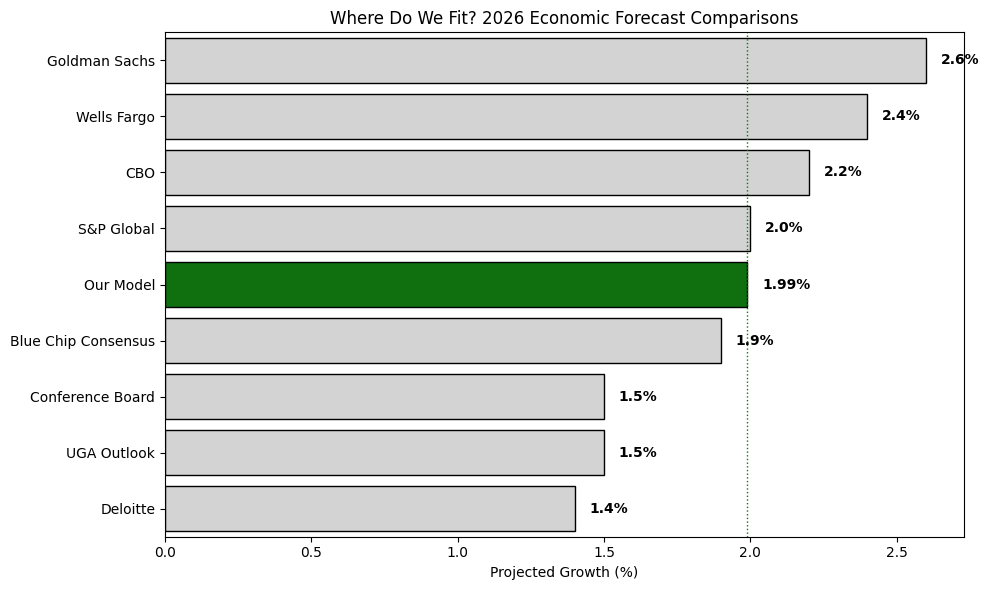

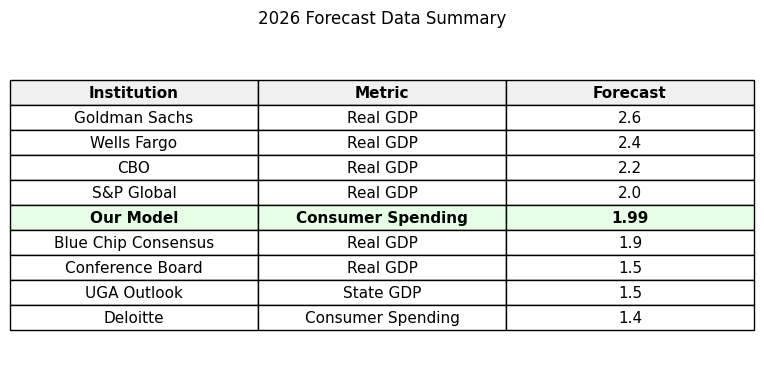

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Define the Data
data = {
    "Institution": ["Goldman Sachs", "Wells Fargo", "CBO", "S&P Global",
                    "Our Model", "Blue Chip Consensus", "Conference Board",
                    "UGA Outlook", "Deloitte"],
    "Forecast": [2.6, 2.4, 2.2, 2.0, 1.99, 1.9, 1.5, 1.5, 1.4],
    "Metric": ["Real GDP", "Real GDP", "Real GDP", "Real GDP",
               "Consumer Spending", "Real GDP", "Real GDP",
               "State GDP", "Consumer Spending"]
}

df_comp = pd.DataFrame(data)

# 2. Create the Bar Chart
plt.figure(figsize=(10, 6))
# Create a color list: Grey for everyone, Green for 'Our Model'
colors = ["#d3d3d3" if x != "Our Model" else "#008000" for x in df_comp["Institution"]]

ax = sns.barplot(x="Forecast", y="Institution", data=df_comp, palette=colors, edgecolor="black")

# Add the 1.99% Reference Line
plt.axvline(1.99, color="green", linestyle=":", linewidth=1)
plt.title("Where Do We Fit? 2026 Economic Forecast Comparisons")
plt.xlabel("Projected Growth (%)")
plt.ylabel("")

# Add value labels to the bars
for index, value in enumerate(df_comp["Forecast"]):
    plt.text(value + 0.05, index, f"{value}%", va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Create a Formatted Table Image
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# Create the table
table_data = df_comp[["Institution", "Metric", "Forecast"]]
table = ax.table(cellText=table_data.values,
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.5) # Adjust scale for readability

# --- Make Headers Bold ---
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f0f0f0') # Optional: Light grey background for headers

# Highlight "Our Model" row in the table
for i, key in enumerate(table_data["Institution"]):
    if key == "Our Model":
        for j in range(3): # 3 columns
            cell = table[(i+1, j)]
            cell.set_facecolor("#e6ffe6") # Light green background
            cell.set_text_props(weight='bold')

plt.title("2026 Forecast Data Summary", pad=20)
plt.show()

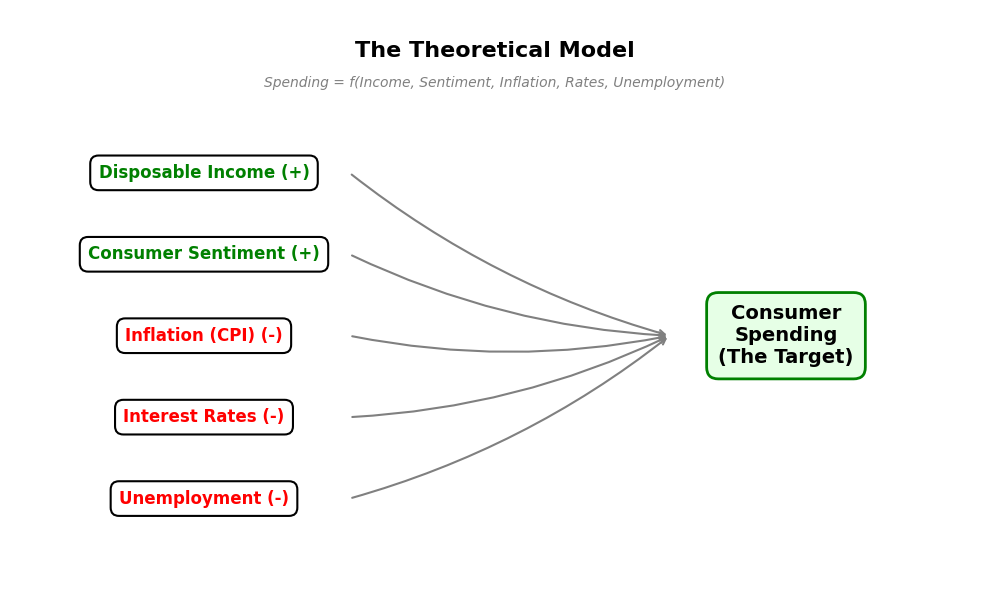

In [5]:
import matplotlib.pyplot as plt

def create_model_graphic():
    # Adjusted ylim to 7 to make room for the title above the top box
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 7)
    ax.axis('off')

    # Define Box Properties
    box_props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', linewidth=1.5)
    target_props = dict(boxstyle='round,pad=0.6', facecolor='#e6ffe6', edgecolor='green', linewidth=2)

    # 1. The Output (Dependent Variable) - centered vertically relative to inputs
    ax.text(8, 3, "Consumer\nSpending\n(The Target)", ha='center', va='center', fontsize=14, fontweight='bold', bbox=target_props)

    # 2. The Inputs (Independent Variables)
    inputs = [
        ("Disposable Income", "(+)", 5),
        ("Consumer Sentiment", "(+)", 4),
        ("Inflation (CPI)", "(-)", 3),
        ("Interest Rates", "(-)", 2),
        ("Unemployment", "(-)", 1)
    ]

    # Draw Inputs and Arrows
    for i, (label, sign, y_pos) in enumerate(inputs):
        # Draw the Input Box
        color = 'black'
        if sign == "(+)": color = 'green'
        if sign == "(-)": color = 'red'

        ax.text(2, y_pos, f"{label} {sign}", ha='center', va='center', fontsize=12, fontweight='bold', color=color, bbox=box_props)

        # Draw the Arrow
        ax.annotate("",
                    xy=(6.8, 3), xycoords='data',
                    xytext=(3.5, y_pos), textcoords='data',
                    arrowprops=dict(arrowstyle="->", color='gray', lw=1.5, connectionstyle="arc3,rad=0.1"))

    # 3. The Function Label - Moved UP to y=6.5 and y=6.1
    ax.text(5, 6.5, "The Theoretical Model", ha='center', va='center', fontsize=16, fontweight='bold')
    ax.text(5, 6.1, "Spending = f(Income, Sentiment, Inflation, Rates, Unemployment)", ha='center', va='center', fontsize=10, style='italic', color='gray')

    plt.tight_layout()
    plt.show()

create_model_graphic()